In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Use a single color palette 
sns.set_palette("Blues")        
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#1e608f"])

## Load & Explore Data

In [2]:
# load dataset
path_mat = "../data/student-mat.csv"
path_por = "../data/student-por.csv"

df_mat = pd.read_csv(path_mat, sep=";")
df_por = pd.read_csv(path_por, sep=";")

print(f"Shape of the df_mat is : {df_mat.shape}\n")
print(f"Shape of the df_por is : {df_por.shape}")

Shape of the df_mat is : (395, 33)

Shape of the df_por is : (649, 33)


In [3]:
df_mat.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,3,5,2,2,2,1,2,15,14,14
222,GP,F,16,U,GT3,T,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
111,GP,F,16,R,GT3,T,3,3,services,other,...,4,1,2,1,1,2,0,7,10,10
301,GP,M,17,U,LE3,T,4,4,other,teacher,...,4,1,1,2,2,5,0,11,11,10
87,GP,F,15,U,GT3,T,4,2,other,other,...,5,3,3,1,3,1,4,13,14,14


In [4]:
df_por.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
207,GP,M,16,R,GT3,T,3,3,services,services,...,4,3,2,3,4,5,0,11,10,10
154,GP,F,16,U,LE3,T,1,1,at_home,at_home,...,3,4,4,3,3,1,4,10,11,11
26,GP,M,15,U,GT3,T,2,2,other,other,...,4,2,2,1,2,5,8,11,12,12
338,GP,F,17,R,LE3,T,3,1,services,other,...,3,1,2,1,1,3,0,18,19,19
560,MS,M,17,R,GT3,T,1,1,other,services,...,4,5,5,1,3,2,0,10,9,10


---

**In this case, we have exactly the same column in the data. We will do all the work on the first Portuguese and apply the pipe to the mathematics.**

---

In [5]:
# use math dataset for all the analysis
df = df_por
print(f"Shape of the data is : {df.shape}\n\n")
df.info()

Shape of the data is : (649, 33)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649

In [6]:
# spelt the data into numeric and categorical
num_cols = df.select_dtypes(include="int64").columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

print(f"Numeric columns {len(num_cols)} is : {num_cols}")
print(f"Categorical columns {len(cat_cols)} is : {cat_cols}")

Numeric columns 16 is : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical columns 17 is : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [7]:
# describe numeric columns
df[num_cols].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


* **We will have extreme values ​​in the `absences & failures & Dalc`**
* **The std in `absences` so large** :-->
in absences Because there may be students who are enrolled and left the school, or one of them has traveled or faced a medical condition and does not know how to take a leave.

In [8]:
# describe categorical columns
df[cat_cols].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


* In all binary columns we will apply `Label Encoding` and in the remaining columns {Mjob, Fjob, reason, guardian} we will apply `One-Hot Encoding`

## Data Cleaning

### Missing values

In [9]:
# check for missing values
df.isnull().sum().sum()

np.int64(0)

### Duplicates

In [10]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

### Outliers

In [11]:
# Function to get outliers based on IQR method
def get_outliers(df):
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df < lower_bound) | (df > upper_bound)]

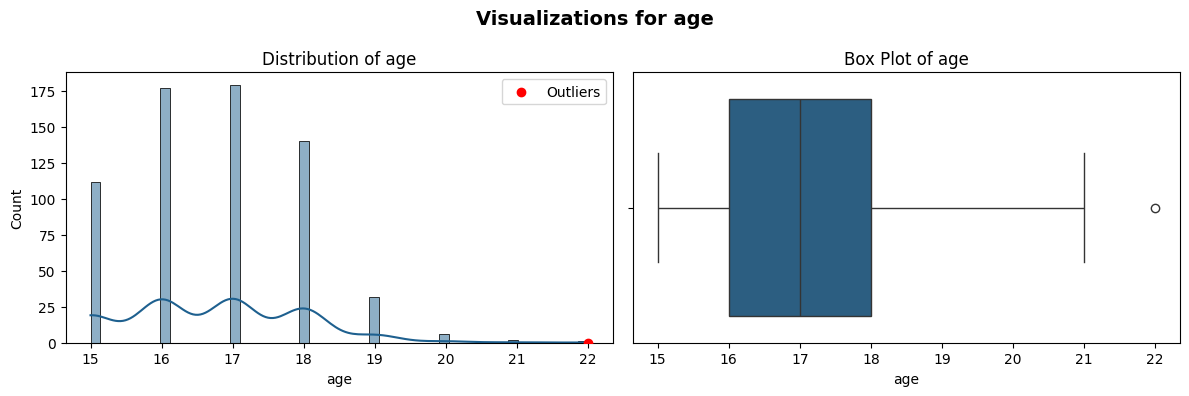

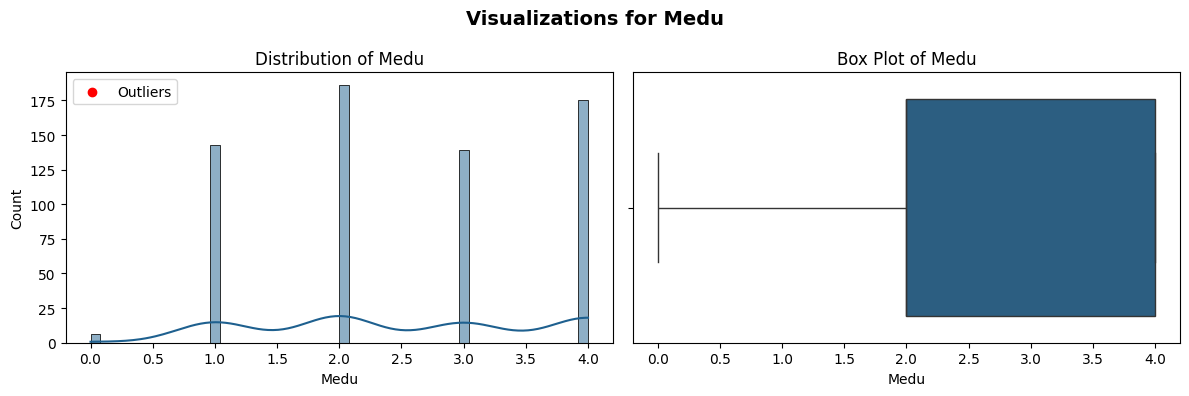

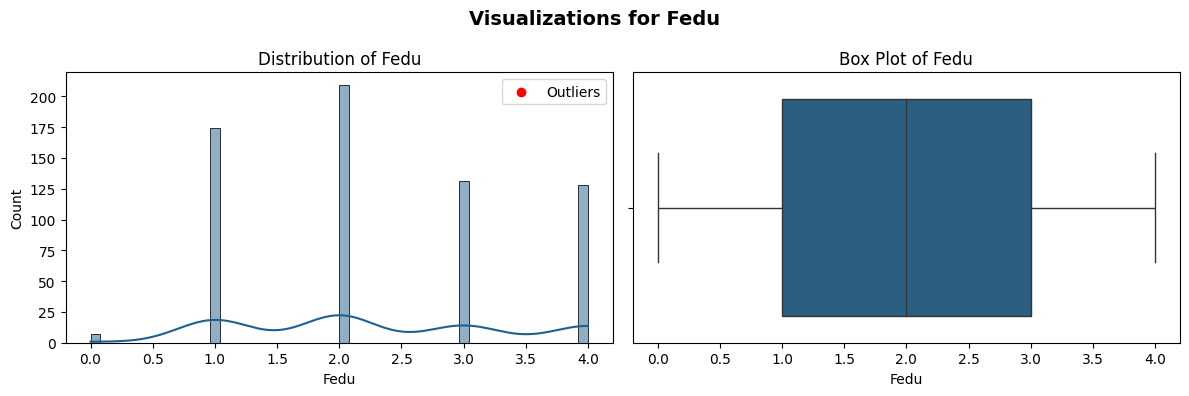

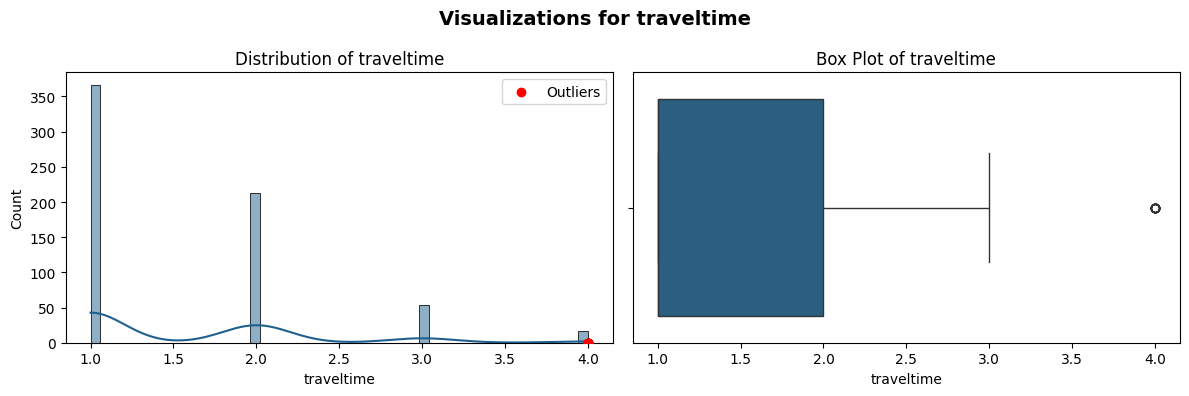

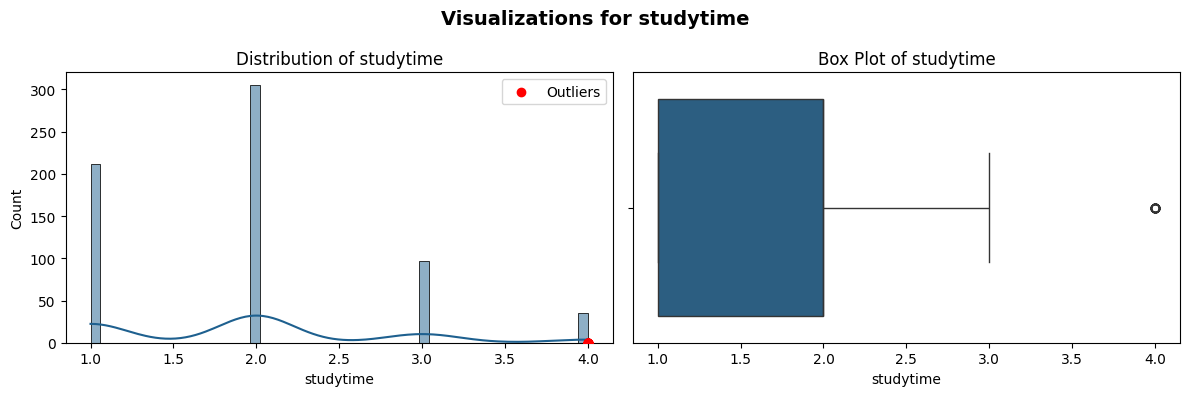

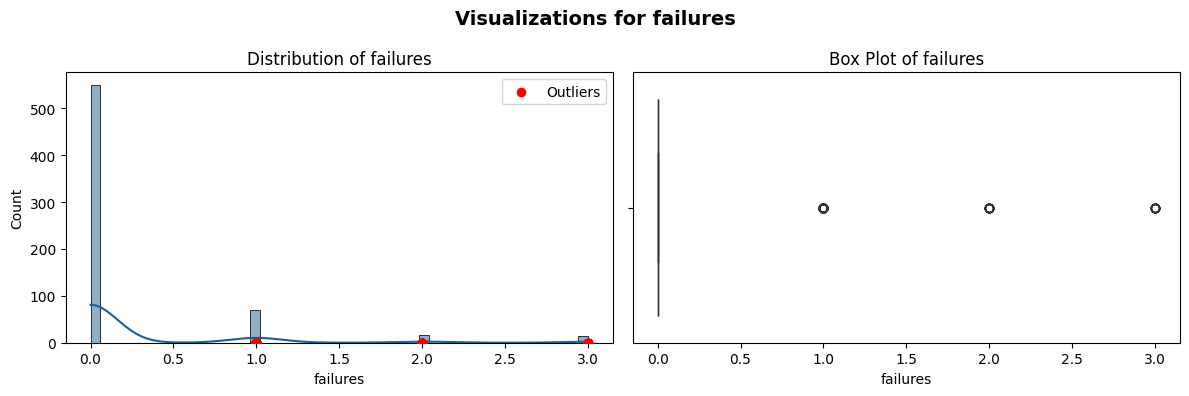

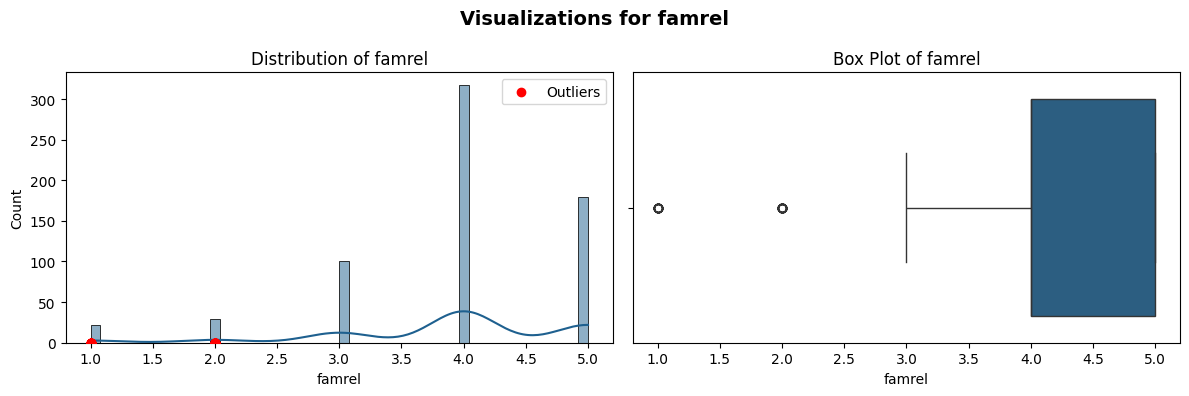

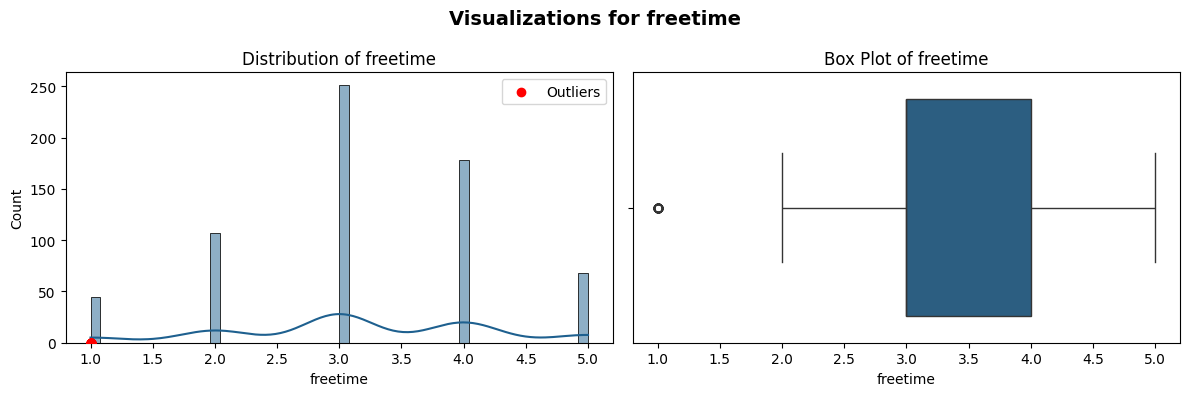

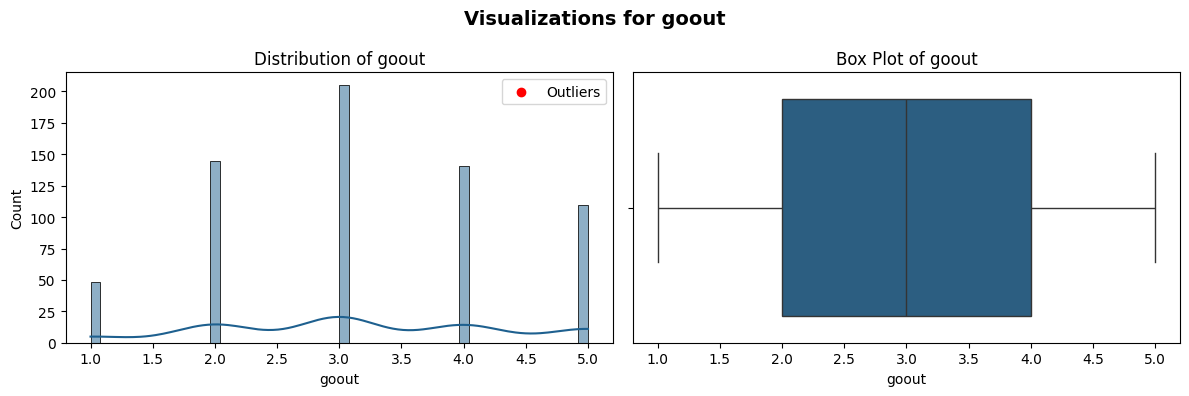

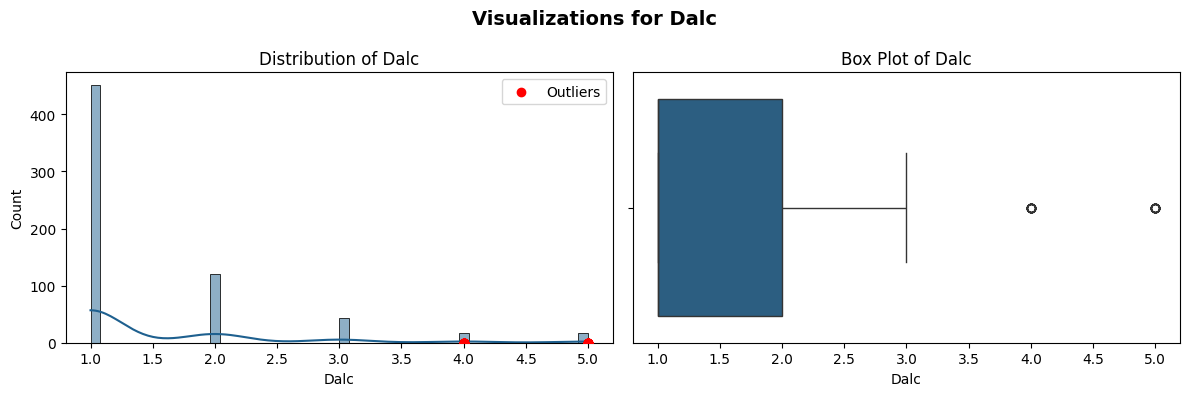

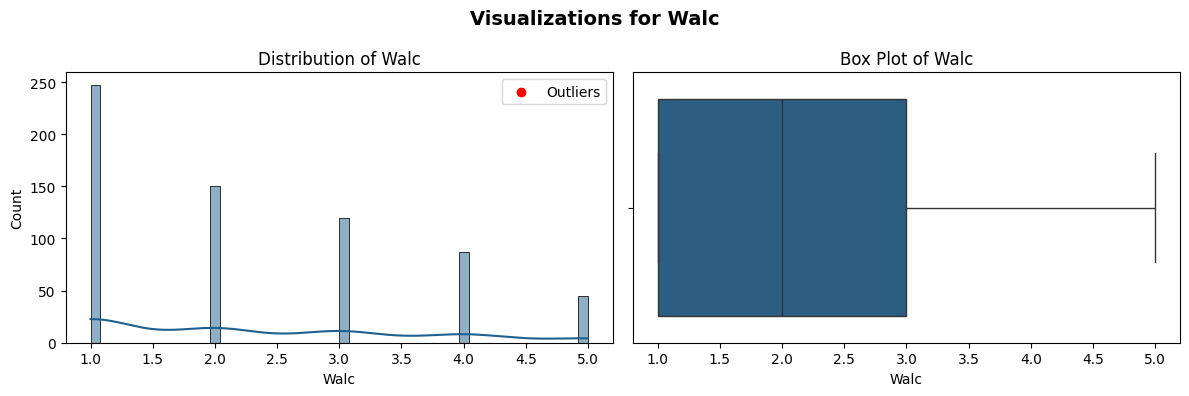

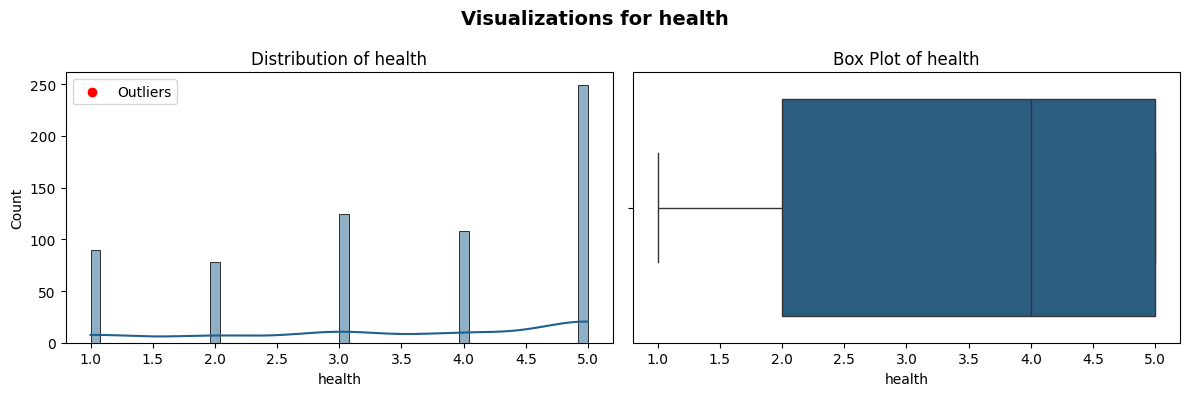

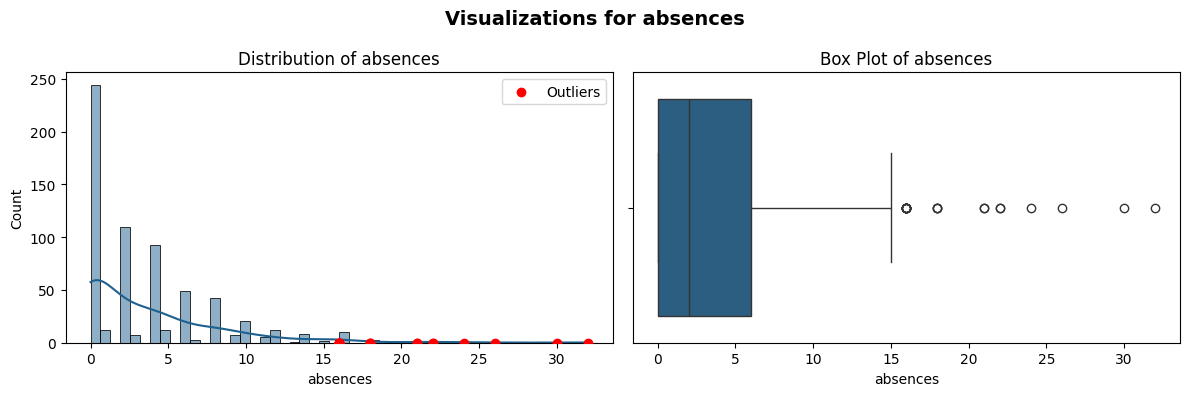

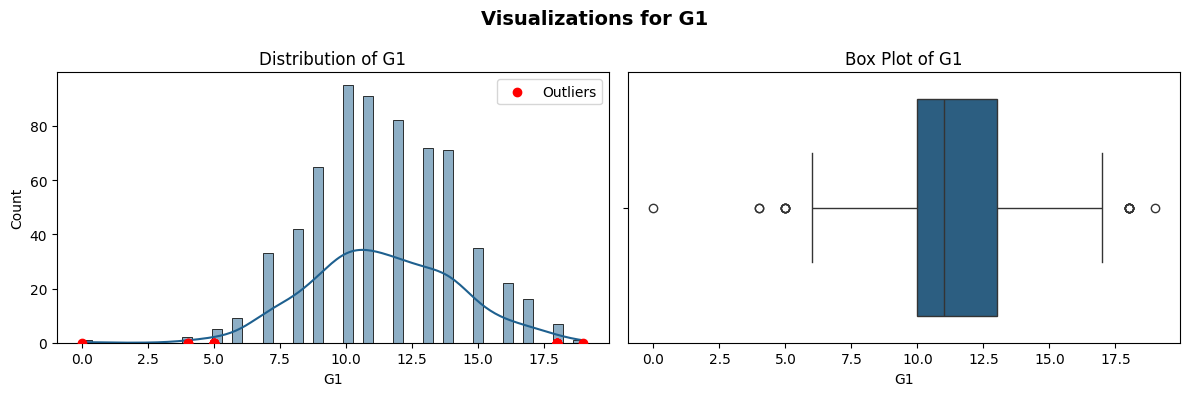

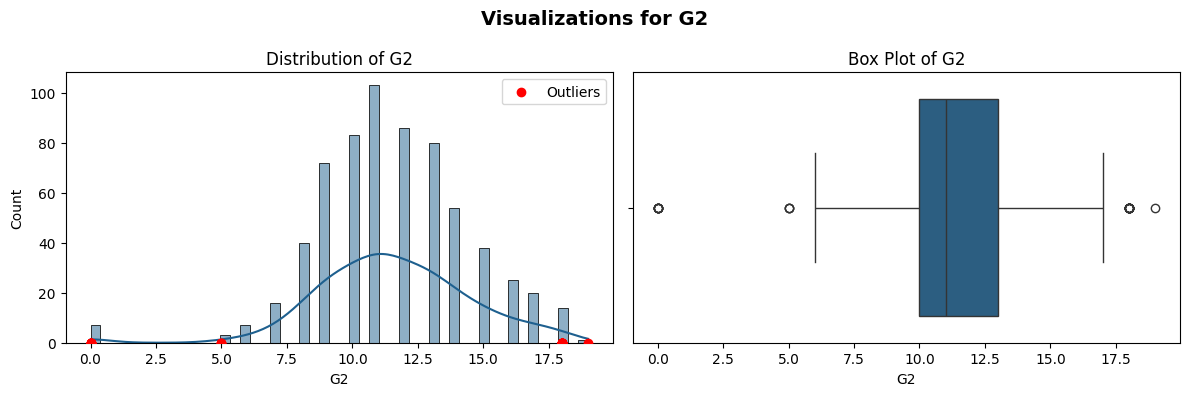

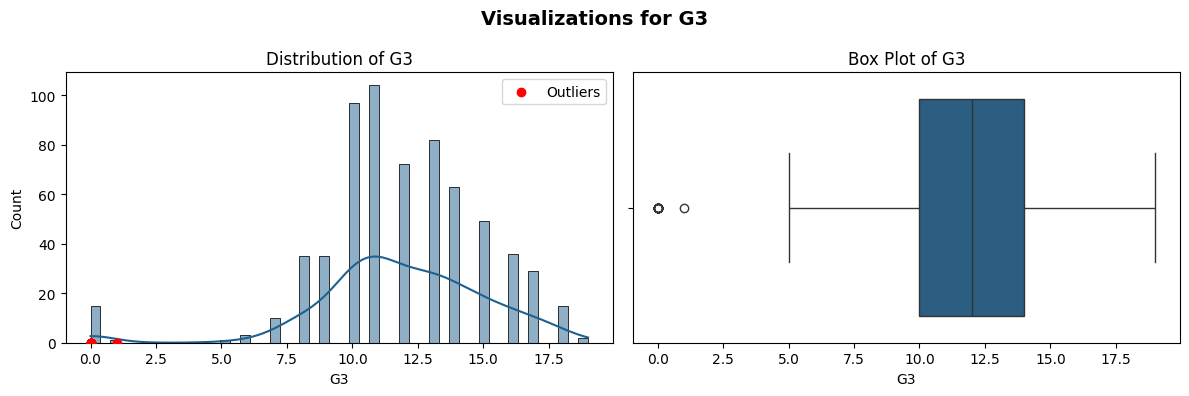

In [12]:
# Visualize the distribution & outliers of numerical columns
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Visualizations for {col}", fontsize=14, fontweight='bold')

    # Histogram with KDE
    sns.histplot(df[col], kde=True, bins=50, ax=axes[0])
    
    # Highlight outliers
    outliers = get_outliers(df[col].dropna())
    axes[0].scatter(outliers, [0]*len(outliers), color='red', label='Outliers', zorder=5)
    
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].legend()

    # Box plot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Box Plot of {col}")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

**We will not remove any extreme values ​​because these values ​​naturally exist and represent real cases.**

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [13]:
def cat_visualization(cols , df=df):
    n = len(cols)
    n_cols = 3
    n_rows = math.ceil(n / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() 
    fig.suptitle("Categorical Columns", fontsize=16, fontweight='bold', y=1.01)

    # Plot each categorical column
    for i, col in enumerate(cols):
        total = len(df[col])
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f"Plot of {col}")
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

        # Annotate percentages on bars
        for p in axes[i].patches:
            height = p.get_height()
            percentage = height / total * 100
            axes[i].annotate(f'{percentage:.1f}%',  
                            (p.get_x() + p.get_width()/2., height),  
                            ha='center', va='bottom',
                            fontsize=12)

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.subplots_adjust()
    plt.tight_layout()
    plt.show()


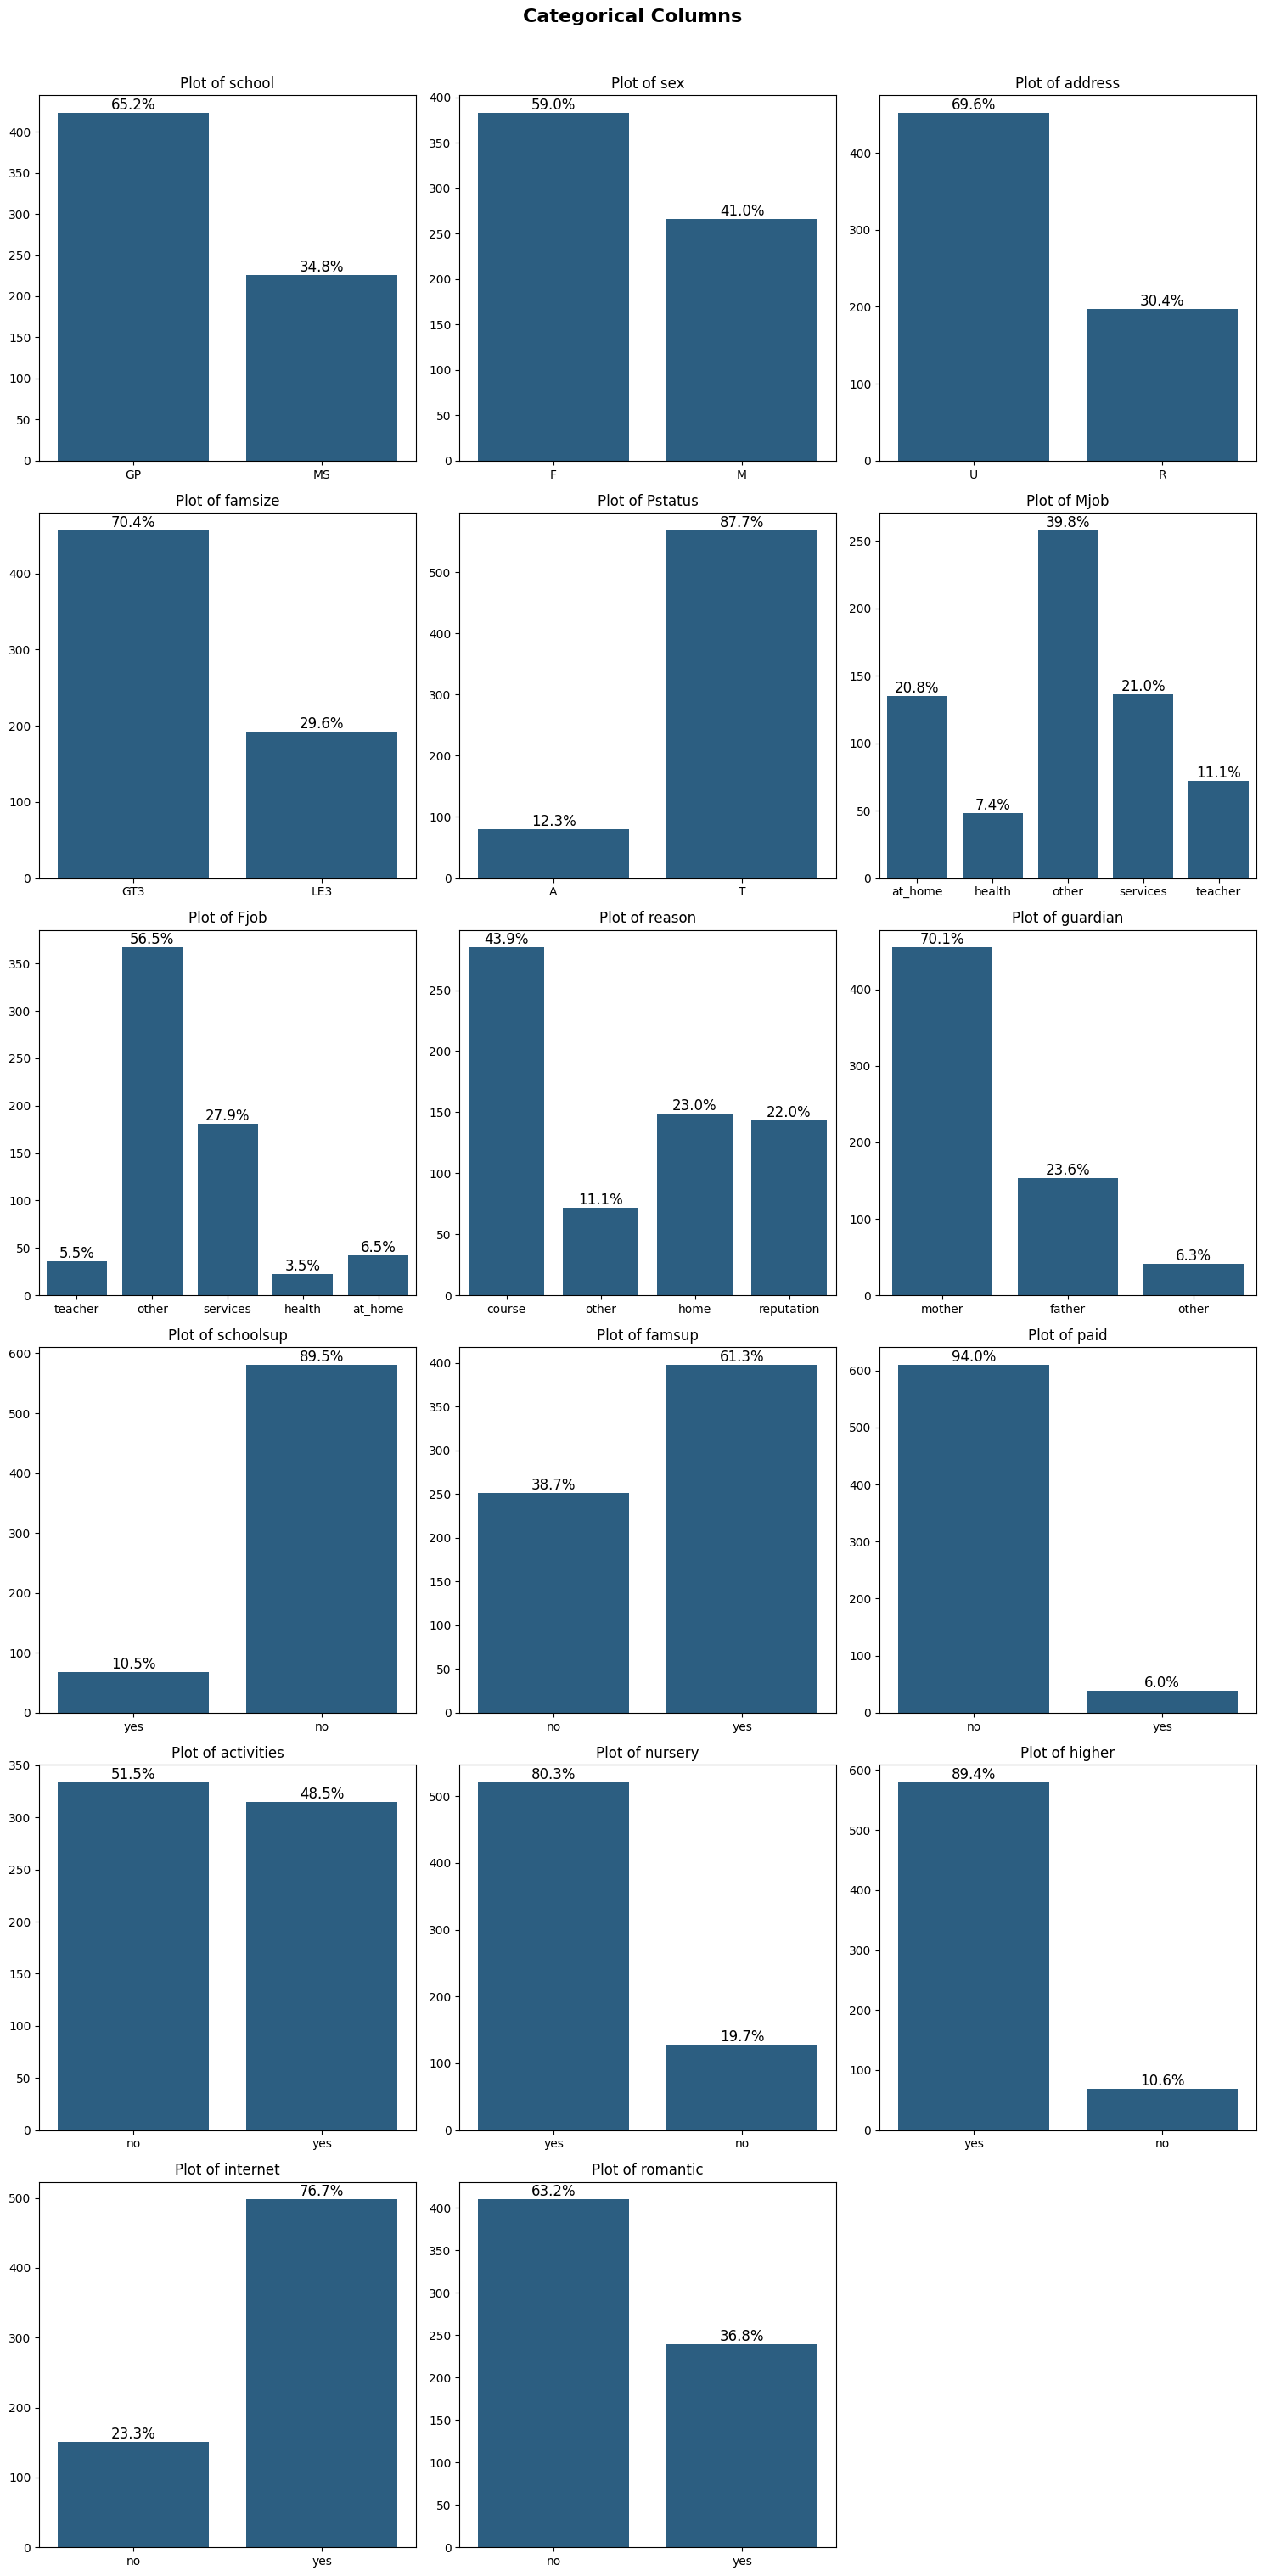

In [14]:
cat_visualization(cat_cols)

* The dataset is balanced only in `activities and sex`  , with representing ``[Y 48% & N 52%]`` and ``[M 41% & F 59%]``

* maybe use Oversampling or Undersampling
* in evaluation we nead use **F1-score**, Precision/Recall, ROC-AUC **not** accuracy

In [15]:
def num_visualization(cols, df=df):
    
    num_cols = 3
    num_rows = math.ceil(len(cols) / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize= (15, 5 * num_rows))
    axes = axes.flatten()
    fig.suptitle('Numeric Columns', fontsize= 14, fontweight= 'bold', y= 1.01)

    for i, col in enumerate(cols):
        sns.histplot(df, x= col, stat= 'count', kde= True, ax= axes[i])
        axes[i].set_title(f"Plot of {col}")
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


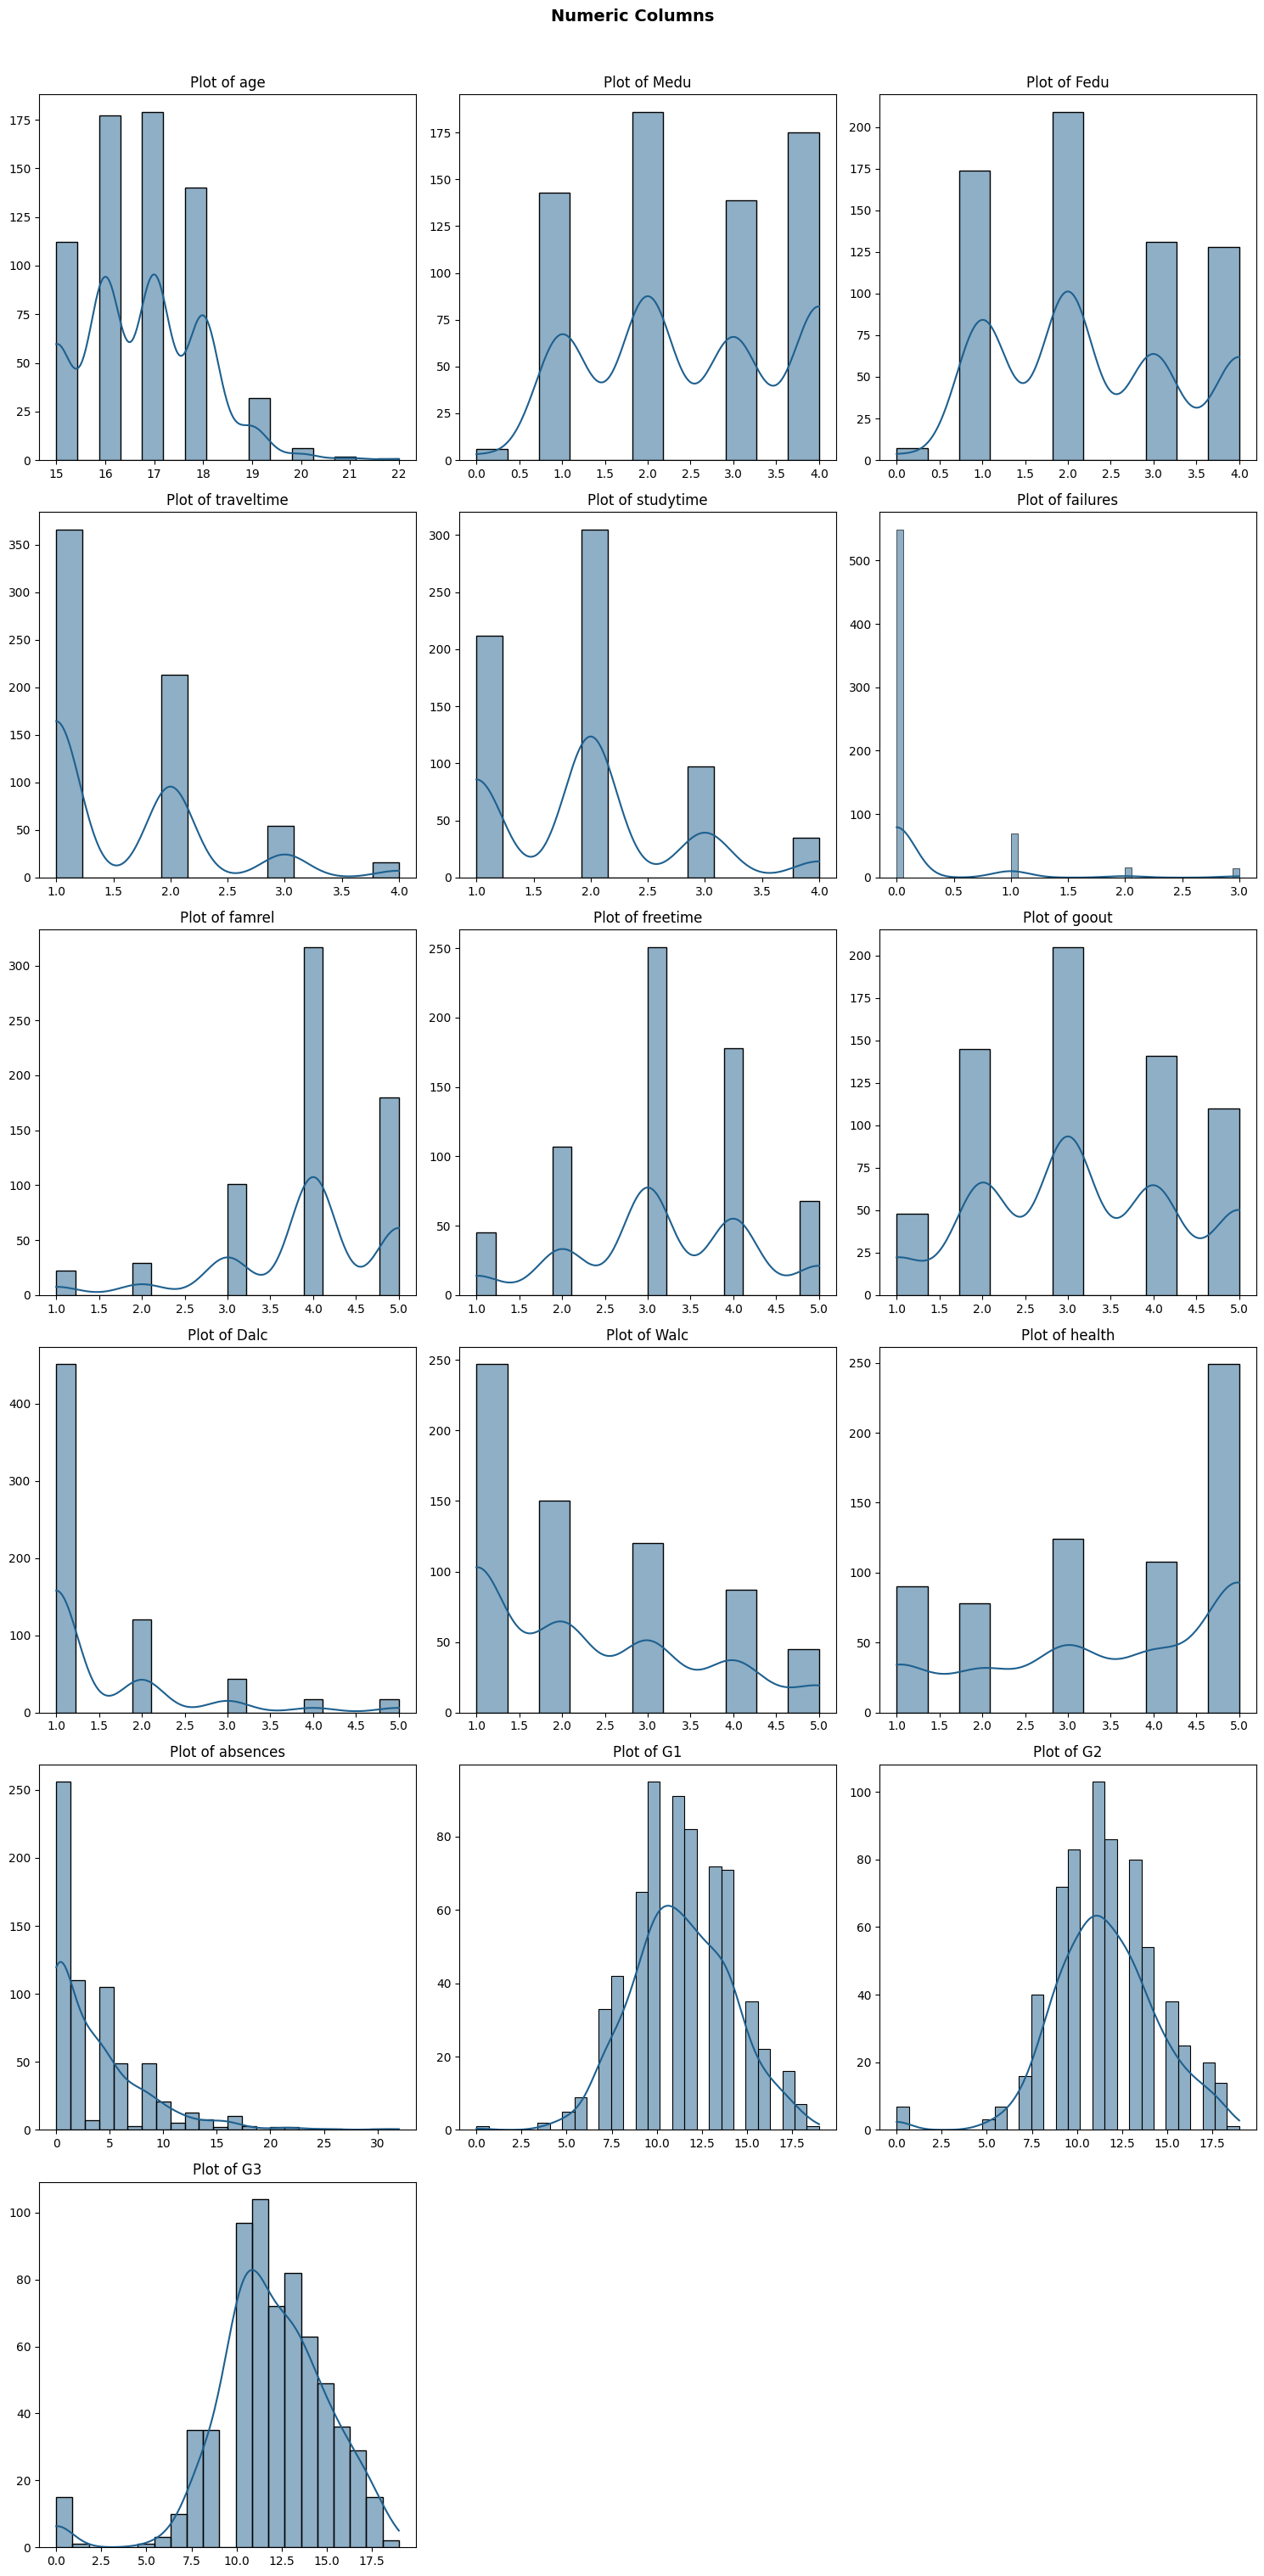

In [16]:
num_visualization(num_cols)


1. **Parental Education**

   * Most parents have a **medium education level**.
   * Fathers tend to have a **higher education level** compared to mothers.

2. **School Proximity**

   * The majority of students live **close to school**.

3. **Study Time**

   * Most students spend **less than 5 hours per week** studying.

4. **Free Time**

   * Students have a **moderate amount of free time**.

5. **Alcohol Consumption**

   * A **considerable proportion** of students consume alcohol during weekends.

---




### Multivariate Analysis

In [17]:
# Correlation matrix
corr = df[num_cols].corr()

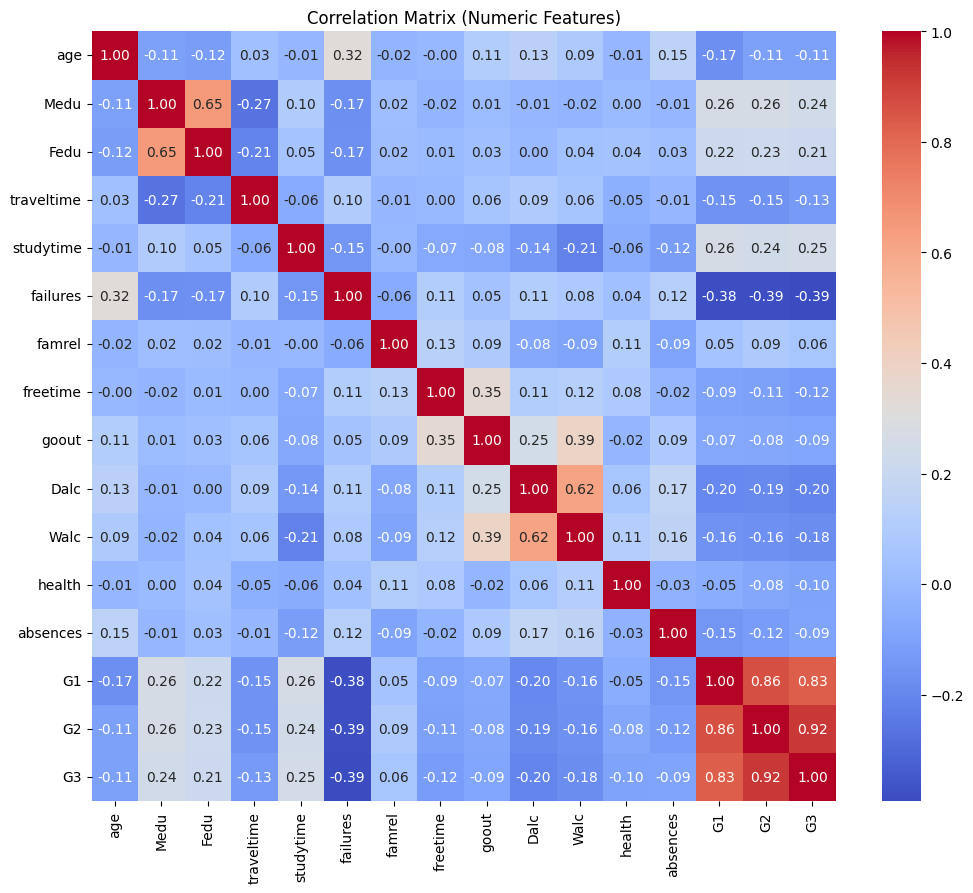

In [18]:
# heatmap Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

<details>
<summary>The Correlation Matrix Insights (Click to expand)</summary>

#### **Key Observations**

1. **Previous Grades are the Strongest Predictors**

   * G1 and G2 are highly positively correlated with G3 (0.83 and 0.92).
   * Using G1 and G2 to predict G3 can lead to **data leakage** if not handled carefully.

2. **Parental Education Matters Moderately**

   * Mother's (Medu) and father's (Fedu) education are positively correlated (0.65) and have a moderate positive correlation with student grades.
   * Students with higher-educated parents tend to achieve slightly better grades.

3. **Failures Negatively Affect Grades**

   * Past failures have a notable negative correlation with G3 (-0.39).
   * More past failures → lower final grade.

4. **Study Time Has a Positive Effect**

   * Studytime shows a positive relationship with grades (though weaker than G1/G2).
   * Students who study more generally perform better.

5. **Alcohol Consumption Patterns are Related**

   * Dalc (weekday) and Walc (weekend) are strongly correlated (0.62), but have only weak negative correlation with grades.

6. **Travel Time and Grades**

   * Longer travel times are weakly negatively correlated with grades and parental education, suggesting minor accessibility effects.

7. **Other Features Have Weak or Negligible Correlations**

   * Features like health, freetime, goout, and age show very weak correlation with G3, so they may have limited predictive power on their own.

---

**Summary Insight for Modeling:**

* **Most influential features for predicting G3**: G1, G2, failures, studytime.
* **Moderately influential**: Medu, Fedu, alcohol consumption.
* **Low impact**: health, freetime, goout, age.
* Categorical features may still be important, especially if they interact with numeric ones.


</details>

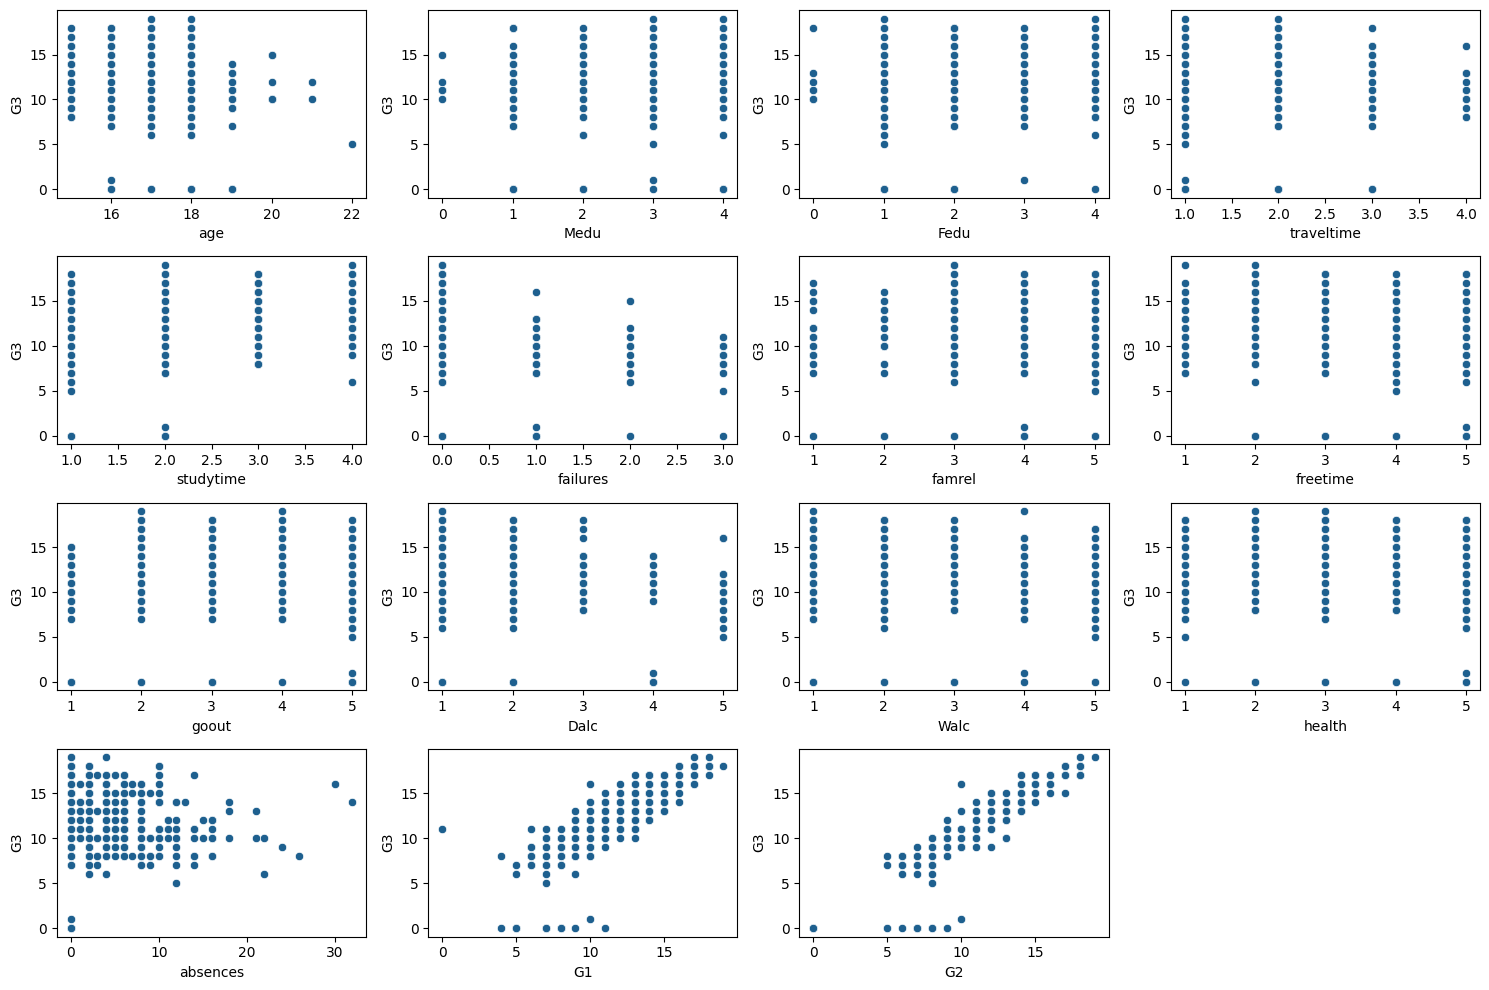

In [19]:
# Scatter plots vs target
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:-1]):  # exclude G3 itself
    plt.subplot(4,4,i+1)
    sns.scatterplot(x=df[col], y=df['G3'])
    plt.xlabel(col)
    plt.ylabel('G3')
plt.tight_layout()
plt.show()



<details>
<summary>Visual Insights from Scatter Plots (Click to expand)</summary>

#### **Key Observations**

* **Age:** No clear linear relationship with G3. Slight negative trend for older students, possibly due to repeating a year.
* **Failures:** Strong negative effect. More past failures → lower G3 scores. Zero failures → many high grades.
* **Study Time:** Positive correlation. More study time (3–4) → higher G3 scores; less study time → wider spread including low grades.
* **Parent's Education (Medu, Fedu):** Higher parental education → higher likelihood of better G3 scores. Lower education → wider score distribution.
* **Absences:** Weak negative trend. Very high absences → low G3, but low absences do not guarantee high grades.
* **G1 and G2:** Extremely strong positive linear relationship with G3. Previous grades are the most predictive features and may cause **data leakage** if used directly.

**Summary Insight:**

* **Most influential features for G3:** `G1`, `G2`, `failures`, `studytime`.
* Other factors (parental education, absences, age) have moderate or weak visual influence.

</details>



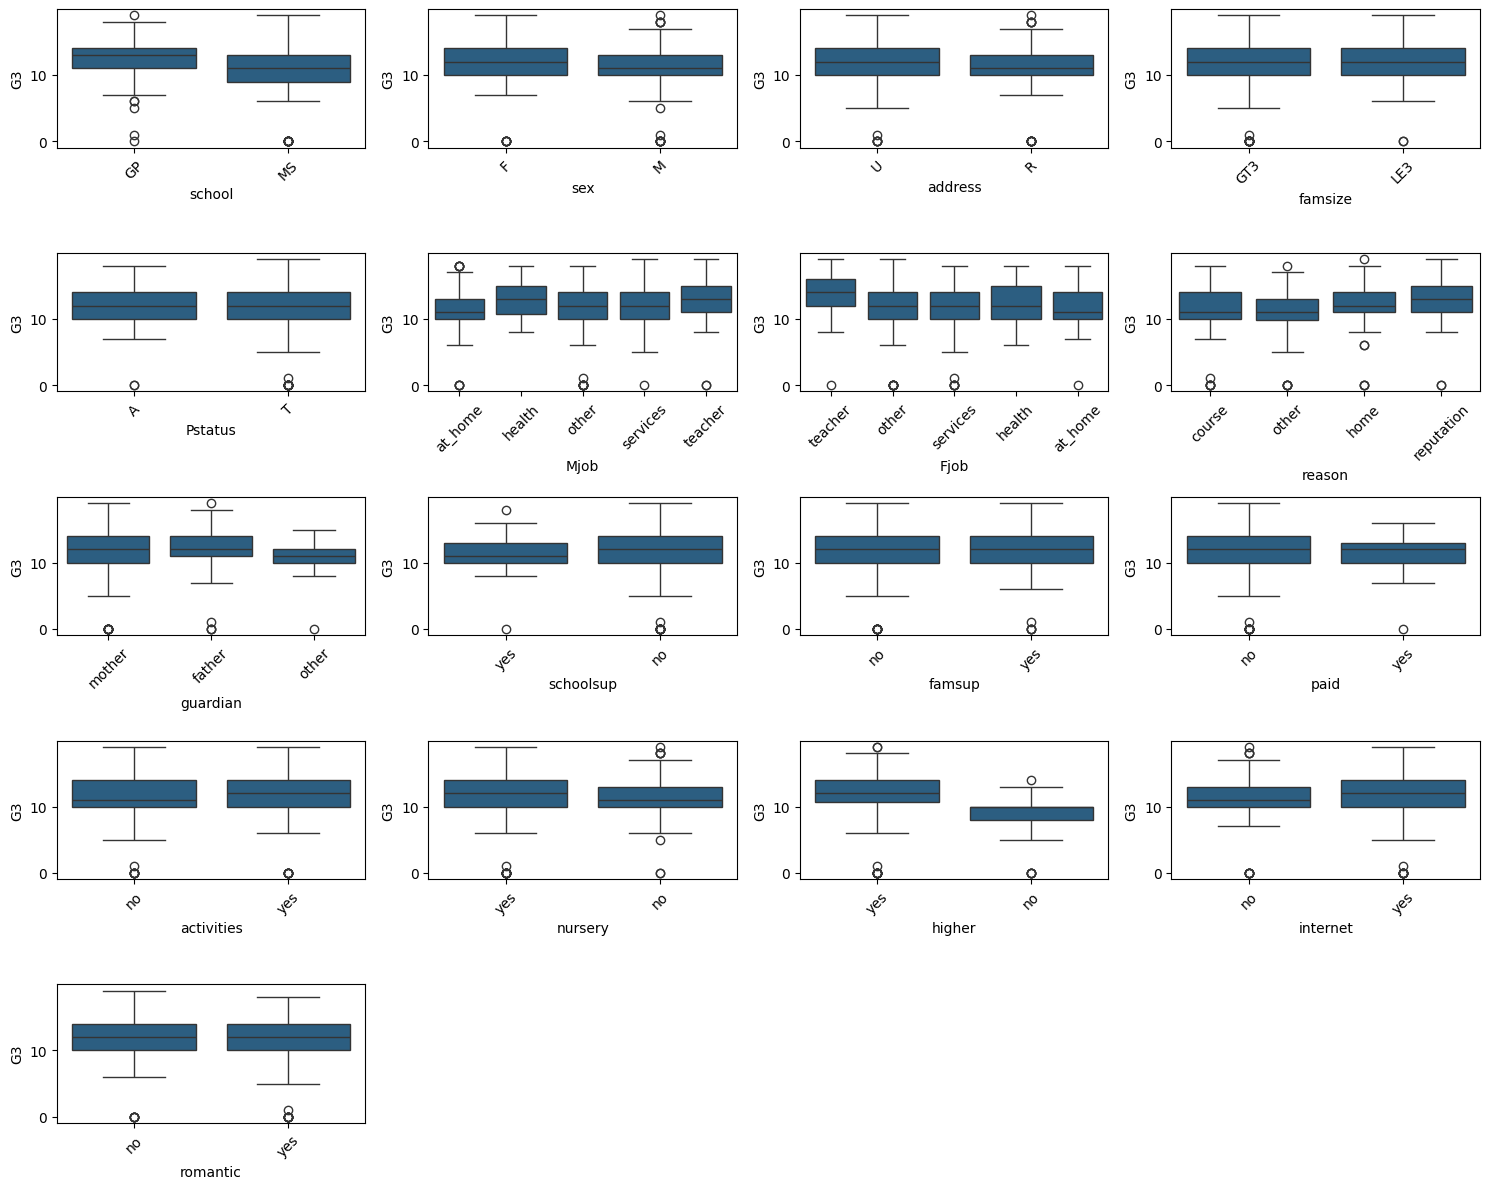

In [20]:
# Box plots for categorical features vs target
plt.figure(figsize=(15,12))
for i, col in enumerate(cat_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df[col], y=df['G3'])
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('G3')
plt.tight_layout()
plt.show()



<details>
<summary>Insights from Categorical Features vs G3 (Click to expand)</summary>

#### **Key Observations**

* **School:** `GP` students have slightly higher median grades and tighter grade ranges than `MS`. Minor performance difference.
* **Sex:** No significant difference between male (`M`) and female (`F`) students.
* **Parents' Job (Mjob, Fjob):** Slight trend: students with mothers as `teacher` have slightly higher G3; father's job less influential.
* **School Support (`schoolsup`):** Students **without support** (`no`) have higher median G3 than those receiving support (`yes`). Likely indicates support is given to struggling students.
* **Romantic Relationship (`romantic`):** Students not in a relationship (`no`) have slightly higher median grades and tighter IQR.
* **Internet Access (`internet`):** Students with internet (`yes`) show higher median grades. Positive impact on performance.
* **Desire for Higher Education (`higher`):** Students wanting higher education (`yes`) have significantly higher median grades and fewer low outliers. Strong predictor of performance.

**Summary Insight:**

* **Most influential categorical features:** `schoolsup`, `higher`, `internet`.
* **Minor impact:** `Mjob`, `Fjob`, `romantic`.
* **Minimal impact:** `sex`, `address`, `famsize`, `Pstatus`.

</details>


In [21]:
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V between two categorical columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

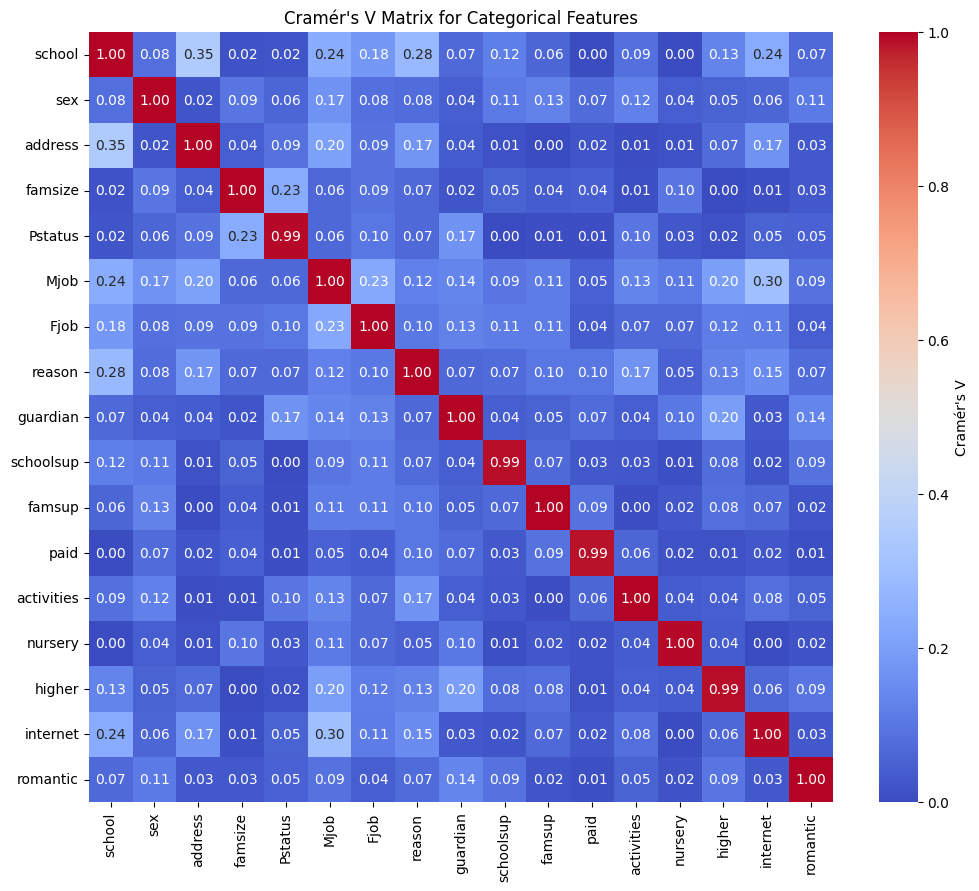

In [22]:
# Create empty matrix
n = len(cat_cols)
matrix = np.zeros((n, n))

# Fill matrix with Cramér's V values
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        matrix[i,j] = cramers_v(df[col1], df[col2])

# Convert to DataFrame for readability
cramers_df = pd.DataFrame(matrix, index=cat_cols, columns=cat_cols)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cramers_df, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label':'Cramér\'s V'})
plt.title("Cramér's V Matrix for Categorical Features")
plt.show()

## Feature Engineering

### 1.Combine rare categories

In [23]:
cat_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare_labels = freq[freq < 0.05].index
    df[col] = df[col].replace(rare_labels, 'Other')


### 2. Encode categorical features

In [24]:
# Label encoding for binary categorical features
bin_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'sex', 'address', 'famsize', 'Pstatus']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in bin_cols:
    df[col] = le.fit_transform(df[col])

### 3. Feature creation

In [25]:
# # Parent education
df['parent_edu'] = df['Medu'] + df['Fedu']
# # Study efficiency
df['study_efficiency'] = df['studytime'] / (df['absences'] + 1)  # +1 to avoid division by zero
# # Alcohol ratio
df['alcohol_ratio'] = df['Dalc'] / (df['Walc'] + 1)
# Struggling flag
df['is_struggling'] = (df['failures'] > 0).astype(int)
# 
df['G1G2_avg'] = (df['G1'] + df['G2']) / 2
# target variable
df['target'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Optional interactions
df['studytime_failures'] = df['studytime'] * df['failures']
df['goout_freetime'] = df['goout'] * df['freetime']

df = df.drop(columns=['G1', 'G2'])

### 4. Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Columns to scale 
Columns = ['age', 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'parent_edu', 'study_efficiency', 'goout_freetime' ]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[Columns] = scaler.fit_transform(df[Columns])

# Optional: check results
df[Columns].describe()

,age,Medu,Fedu,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,parent_edu,study_efficiency,goout_freetime
count,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02
mean,-1.751723e-16,-1.094827e-16,-3.284481e-17,9.579736e-17,-1.628555e-16,1.861206e-16,7.116376e-17,-3.284481e-17,7.937496e-17,-1.149568e-16,2.189654e-17,-6.568962e-17,-8.758616e-17,-2.189654e-17
std,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00
min,-1.432980e+00,-2.218124e+00,-2.098682e+00,-1.122808e+00,-3.068820e+00,-2.075896e+00,-1.859711e+00,-5.435553e-01,-9.976947e-01,-1.754987e+00,-7.891595e-01,-2.379101e+00,-1.016107e+00,-1.583911e+00
25%,-6.114218e-01,-4.539544e-01,-1.188832e+00,-1.122808e+00,7.260615e-02,-1.716465e-01,-1.008546e+00,-5.435553e-01,-9.976947e-01,-1.063015e+00,-7.891595e-01,-8.987208e-01,-8.167572e-01,-7.551799e-01
50%,2.101367e-01,-4.539544e-01,-2.789831e-01,8.365295e-02,7.260615e-02,-1.716465e-01,-1.573803e-01,-5.435553e-01,-2.185083e-01,3.209302e-01,-3.578630e-01,8.819934e-02,-3.503545e-01,-2.579411e-01
75%,1.031695e+00,1.310216e+00,6.308662e-01,8.365295e-02,1.119748e+00,7.804783e-01,6.937850e-01,5.385533e-01,5.606780e-01,1.012903e+00,5.047298e-01,5.816594e-01,1.048854e+00,7.365367e-01
max,4.317929e+00,1.310216e+00,1.540715e+00,2.496576e+00,1.119748e+00,1.732603e+00,1.544950e+00,3.784879e+00,2.119051e+00,1.012903e+00,6.111583e+00,1.568580e+00,3.147666e+00,2.394000e+00


**Scaling Explanation:**
* We applied StandardScaler to the numeric features because some columns contain *`outliers`*. StandardScaler is less sensitive to extreme values compared to MinMax scaling, which could compress the majority of the data.

* We intentionally kept the original outlier values because they represent real and important measurements in the dataset. Preserving them ensures that the model can learn from the true variation in the data.

## Save 

In [27]:
df.to_csv(r"../data/student_prepared.csv", index=False)
